# CSE 464 Data Science
## TERM PROJECT – SMS Spam Classification
#### Cem Önel - Barış Görgülü

## All Libraries and Options

In [163]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.corpus import stopwords
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

%matplotlib inline

pd.set_option('display.max_columns', 500)

## All Function Definitons

In [141]:

# Create table for missing data analysis
def missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data


def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

def text_process(mess):
    nopunc =[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

count = lambda l1,l2: sum([1 for x in l1 if x in l2])


# Feature Enginnering
### (7 Different Features are used.)

In [142]:
redirect_words = ['click', 'login', 'click here']

message=pd.read_csv('spam.csv',sep=',', encoding="ISO-8859-1", usecols = ["v2", "v1"])

message['length']=message['v2'].apply(len)
message['word_count'] = message['v2'].apply(lambda x: len(str(x).split(" ")))
message['avg_word_length'] = message['v2'].apply(lambda x: avg_word(x))
message['redirect_words'] = message['v2'].apply(lambda x: len([x for x in x.split() if x in redirect_words]))
message['digit_number'] = message['v2'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
message['punctuation_count'] = message['v2'].apply(lambda x: count(x,set(string.punctuation)))
message['capital_letter_count'] = message['v2'].apply(lambda x: sum(1 for c in x if c.isupper()))

message.loc[message["v1"] == 'ham', "v1",] = 1
message.loc[message["v1"] == 'spam', "v1",] = 0
message.head()


,v1,v2,length,word_count,avg_word_length,redirect_words,digit_number,punctuation_count,capital_letter_count
0,1,"Go until jurong point, crazy.. Available only ...",111,20,4.600000,0,0,9,3
1,1,Ok lar... Joking wif u oni...,29,6,4.000000,0,0,6,2
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,4.571429,0,2,6,10
3,1,U dun say so early hor... U c already then say...,49,11,3.545455,0,0,6,2
4,1,"Nah I don't think he goes to usf, he lives aro...",61,13,3.769231,0,0,2,2


## Exploratory Data Analysis

In [143]:
message.groupby('v1').describe()

length                                                           \
     count        mean        std   min    25%    50%    75%    max   
v1                                                                    
0    747.0  138.866131  29.183082  13.0  132.5  149.0  157.0  224.0   
1   4825.0   71.023627  58.016023   2.0   33.0   52.0   92.0  910.0   

   word_count                                                      \
        count       mean        std  min   25%   50%   75%    max   
v1                                                                  
0       747.0  23.892905   5.826977  2.0  22.0  25.0  28.0   35.0   
1      4825.0  14.323938  11.538966  1.0   7.0  11.0  19.0  171.0   

   avg_word_length                                                           \
             count      mean       std       min       25%       50%    75%   
v1                                                                            
0            747.0  4.992839  1.005943  3.333333  4.423077  4.884615  5.375   
1           4825.0  4.177574  1.133530  1.500000  3.600000  4.000000  4.500   

              redirect_words                                               \
          max          count      mean       std  min  25%  50%  75%  max   
v1                                                                          
0   17.333333          747.0  0.005355  0.089522  0.0  0.0  0.0  0.0  2.0   
1   49.000000         4825.0  0.000829  0.028784  0.0  0.0  0.0  0.0  1.0   

   digit_number                                               \
          count      mean       std  min  25%  50%  75%  max   
v1                                                             
0         747.0  1.591700  1.258999  0.0  1.0  1.0  2.0  6.0   
1        4825.0  0.132021  0.454137  0.0  0.0  0.0  0.0  9.0   

   punctuation_count                                                 \
               count      mean       std  min  25%  50%  75%    max   
v1                                                                    
0              747.0  5.714859  3.453301  0.0  3.0  5.0  8.0   26.0   
1             4825.0  3.974508  4.767563  0.0  1.0  3.0  5.0  133.0   

   capital_letter_count                                                     
                  count       mean        std  min  25%   50%   75%    max  
v1                                                                          
0                 747.0  15.441767  12.304897  0.0  7.0  14.0  21.0  128.0  
1                4825.0   4.035026  10.110348  0.0  1.0   2.0   3.0  127.0

In [144]:
# Analyse missing data
missing_data_table(message)

,Total,Percent
capital_letter_count,0,0.0
punctuation_count,0,0.0
digit_number,0,0.0
redirect_words,0,0.0
avg_word_length,0,0.0
word_count,0,0.0
length,0,0.0
v2,0,0.0
v1,0,0.0


## Data Visualization

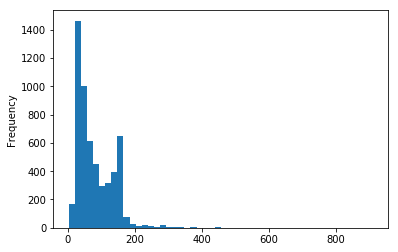

In [145]:
message['length'].plot(bins=50,kind='hist')

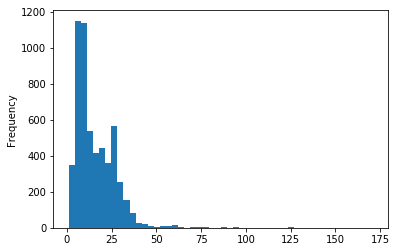

In [146]:
message['word_count'].plot(bins=50,kind='hist')

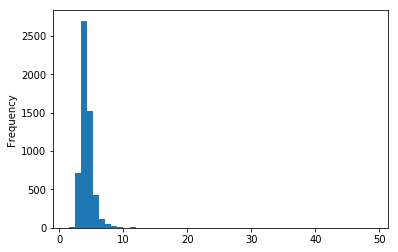

In [147]:
message['avg_word_length'].plot(bins=50,kind='hist')

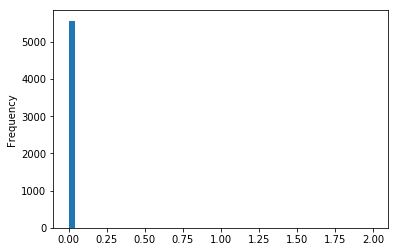

In [148]:
message['redirect_words'].plot(bins=50,kind='hist')

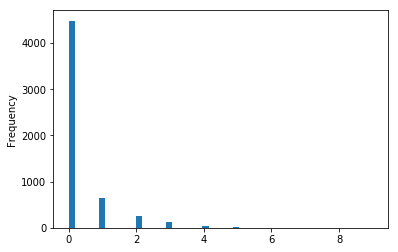

In [149]:
message['digit_number'].plot(bins=50,kind='hist')

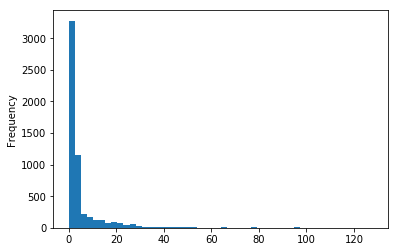

In [150]:
message['capital_letter_count'].plot(bins=50,kind='hist')

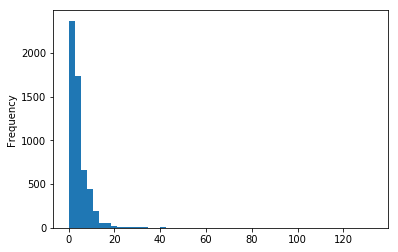

In [151]:
message['punctuation_count'].plot(bins=50,kind='hist')

## Data Preparation (Data Cleaning and Handling Outliers)


In [152]:
message.loc[message['length'] > 500]

,v1,v2,length,word_count,avg_word_length,redirect_words,digit_number,punctuation_count,capital_letter_count
1084,1,For me the love should start with attraction.i...,910,171,4.327485,0,0,22,12
1578,1,How to Make a girl Happy? It's not at all diff...,611,121,4.766990,0,0,133,28
1862,1,The last thing i ever wanted to do was hurt yo...,790,162,3.882716,0,0,34,14
2157,1,Sad story of a Man - Last week was my b'day. M...,588,125,3.712000,0,2,59,53
2433,1,Indians r poor but India is not a poor country...,632,119,4.715596,0,1,55,25
2847,1,Sad story of a Man - Last week was my b'day. M...,588,125,3.712000,0,2,59,53


In [153]:
#Drops redirect_words feature
message.drop('redirect_words', axis=1, inplace=True)

## Splitting Data Frame into Two Parts --> Train and Test

In [171]:
msg_train,msg_test,label_train,label_test = train_test_split(message['v2'],message['v1'],test_size=0.2)

## Text Vectorization (CountVectorizer and TF-IDF Vectorizer)
## and
## Model Building (Naive-Bayes, KNN, Logistic Regression)

### Naive Bayes

In [155]:
pipeline = Pipeline([
   ( 'bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB()),
])

pipeline.fit(msg_train,label_train)
predictions = pipeline.predict(msg_test)
print(classification_report(predictions,label_test))


              precision    recall  f1-score   support

           0       0.71      1.00      0.83       106
           1       1.00      0.96      0.98      1009

   micro avg       0.96      0.96      0.96      1115
   macro avg       0.85      0.98      0.90      1115
weighted avg       0.97      0.96      0.96      1115



### KNN

In [156]:
pipeline2 = Pipeline([
   ( 'bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',KNeighborsClassifier(n_neighbors=3)),
])

pipeline2.fit(msg_train, label_train)
predictions = pipeline2.predict(msg_test)
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

           0       0.39      1.00      0.56        59
           1       1.00      0.91      0.95      1056

   micro avg       0.92      0.92      0.92      1115
   macro avg       0.70      0.96      0.76      1115
weighted avg       0.97      0.92      0.93      1115



## Logistic Regression

In [157]:
pipeline3 = Pipeline([
   ( 'bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')),
])

pipeline3.fit(msg_train, label_train)
predictions = pipeline3.predict(msg_test)
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       120
           1       1.00      0.97      0.98       995

   micro avg       0.97      0.97      0.97      1115
   macro avg       0.90      0.98      0.94      1115
weighted avg       0.98      0.97      0.97      1115



## Ensemble Learning with our three models

In [170]:
#log_clf = LogisticRegression()
#knn_clf = KNeighborsClassifier()
#nb_clf = MultinomialNB()
#
#pipeline4 = Pipeline([
#   ( 'bow',CountVectorizer(analyzer=text_process)),
#    ('tfidf',TfidfTransformer()),
#    ('voting', VotingClassifier(solver='lbfgs',estimators = [('lr', log_clf), ('kn', knn_clf), ('nb', nb_clf)], voting='hard')))
#    ),
#])
#
#pipeline4.fit(msg_train, label_train)
#predictions = pipeline4.predict(msg_test)
##
##voting_classifier = VotingClassifier(solver='lbfgs',estimators = [('lr', log_clf), ('kn', knn_clf), ('nb', nb_clf)], voting='hard')
##for clf in (log_clf, knn_clf, nb_clf, )

## So,
#### Voting Classfier gives best results. But if we look only one classifier Naive bayes gives best results.